### Малышев Тимофей Евгеньевич РИ-320930

## Инициализация и загрузка датасета

df - Основной датасет, с которым будет происходить работа
<br>data - копия изначального датасета

In [1034]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset.csv')
data = df.copy()

Рассмотрим общую картину датасета и его некоторые значения

In [1037]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Анализ датасета

Инфо для всего датасета

In [1041]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Количество значений популярности

In [1044]:
df.popularity.value_counts()

popularity
0      16020
22      2354
21      2344
44      2288
1       2140
       ...  
96         7
94         7
95         5
100        2
99         1
Name: count, Length: 101, dtype: int64

Количество треков у артистов

In [1047]:
df.artists.value_counts()

artists
The Beatles                                                                 279
George Jones                                                                271
Stevie Wonder                                                               236
Linkin Park                                                                 224
Ella Fitzgerald                                                             222
                                                                           ... 
Automatic Tasty                                                               1
o9                                                                            1
Pyotr Ilyich Tchaikovsky;National Philharmonic Orchestra;Richard Bonynge      1
tstewart;Ólafur Arnalds                                                       1
Jesus Culture                                                                 1
Name: count, Length: 31437, dtype: int64

Колонки датасета

In [1050]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

### Расшифровка значений колонок
<ol>
<li>Unnamed: 0: Это индексная колонка, автоматически созданная Pandas при загрузке данных. Обычно она не несёт смысловой нагрузки и используется только для нумерации строк.</li>
<li>track_id: Уникальный идентификатор трека в базе данных Spotify.</li>
<li>artists: Список исполнителей, участвовавших в создании трека. Может содержать одного или нескольких артистов.</li>
<li>album_name: Название альбома, к которому принадлежит трек.</li>
<li>track_name: Название самого трека.</li>
<li>popularity: Популярность трека на платформе Spotify. Значения обычно варьируются от 0 до 100, где 100 означает максимальную популярность.</li>
<li>duration_ms: Продолжительность трека в миллисекундах.</li>
<li>explicit: Флаг, указывающий, является ли трек "эксплицитным" (содержит ненормативную лексику или контент для взрослых).</li>
<li>danceability: Оценка танцевальности трека. Чем выше значение, тем больше вероятность, что трек подходит для танцев.</li>
<li>energy: Уровень энергии трека. Высокие значения указывают на энергичные композиции, низкие – на более спокойные.</li>
<li>key: Музыкальная тональность трека. Обычно обозначается цифрой от 0 до 11, соответствующей мажорным и минорным тонам.</li>
<li>loudness: Громкость трека в децибелах (дБ). Отрицательные значения означают тихую громкость, положительные – высокую.</li>
<li>mode: Режим трека, который указывает, написан он в мажоре (1) или миноре (0).</li>
<li>speechiness: Степень присутствия речи в треке. Высокое значение говорит о том, что речь играет важную роль в композиции.</li>
<li>acousticness: Оценка акустичности трека. Высокие значения говорят о преобладании акустических инструментов.</li>
<li>instrumentalness: Показатель наличия инструментальной музыки без вокала. Высокие значения соответствуют чисто инструментальным композициям.</li>
<li>liveness: Вероятность того, что трек был записан вживую. Высокие значения предполагают живую запись.</li>
<li>valence: Эмоциональная окраска трека. Высокие значения ассоциируются с позитивными эмоциями, низкие – с негативными.</li>
<li>tempo: Темп трека в ударах в минуту (BPM).</li>
<li>time_signature: Размер музыкальной композиции, например, 4/4, 3/4 и т.д.</li>
<li>track_genre: Жанровая принадлежность трека.</li>
</ol>

Удалим из датасета ID трека и номер записи в датасете

In [1054]:
df = df.drop(['Unnamed: 0', 'track_id'],axis=1)

Статистическое описание значений датасета 

In [1057]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


Проверка на наличие NaN значений

In [1060]:
df.isna().sum()

artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Нашлось всего-лишь по одному из значений в artists album_name track_name. Заполним эти поля пробелом, все равно они строковые.

In [1063]:
df = df.fillna(' ')

Графики распределения всех численных значений в датасете

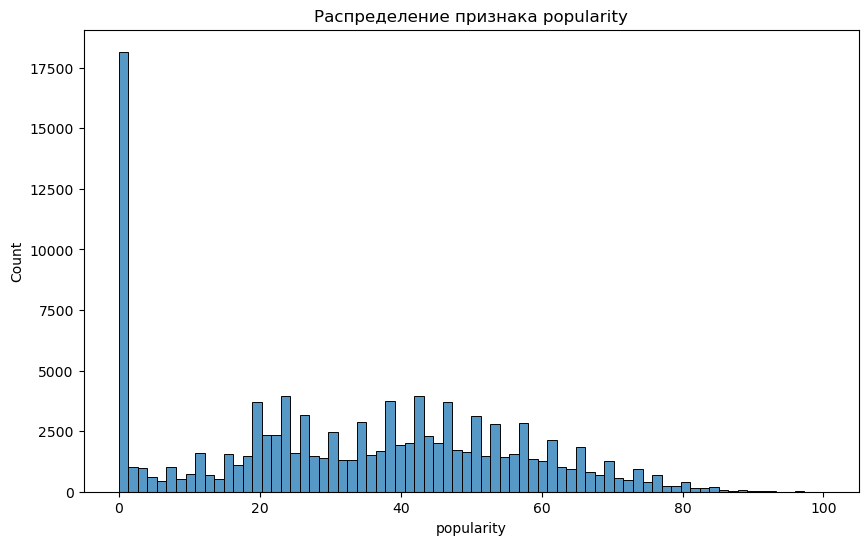

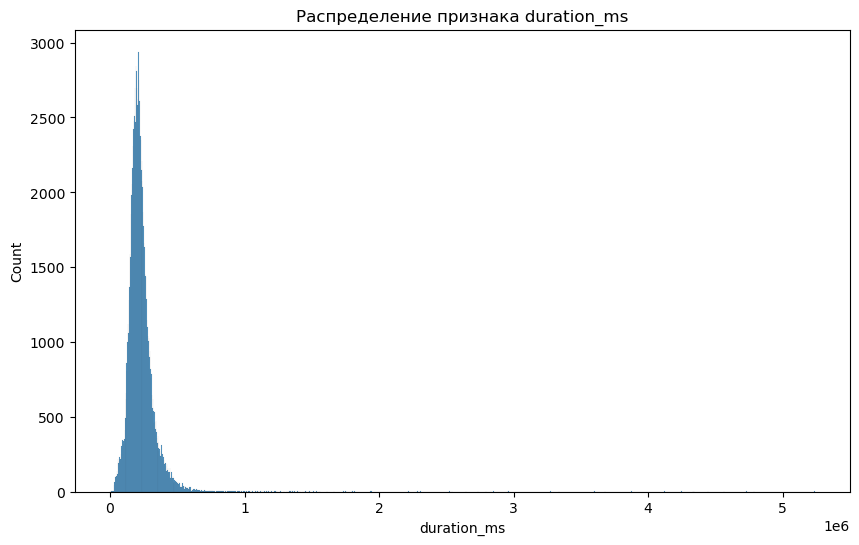

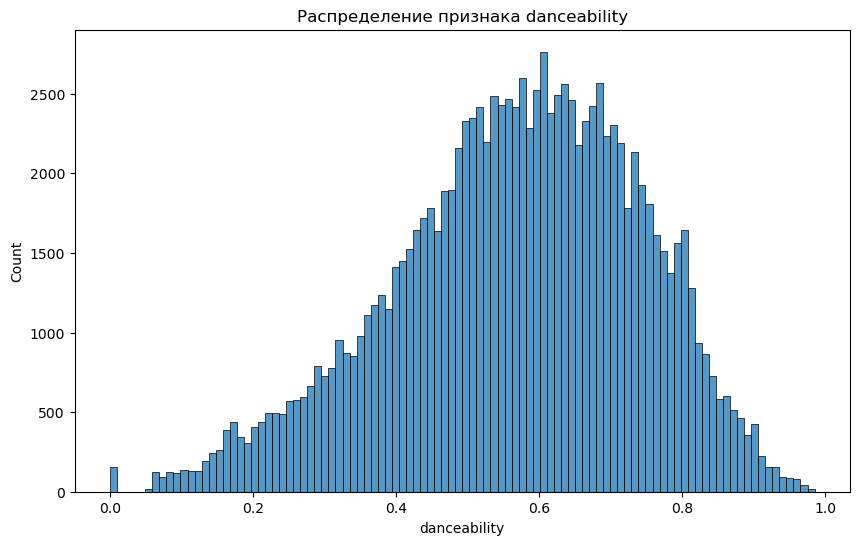

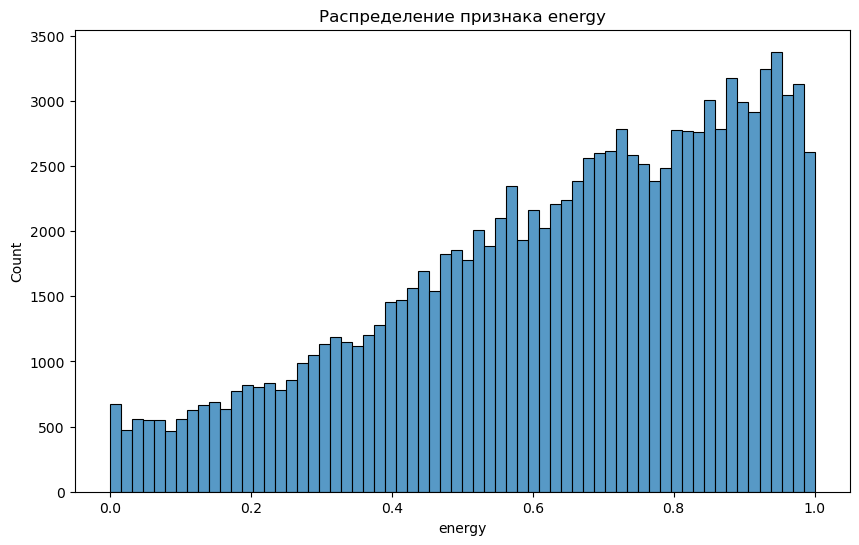

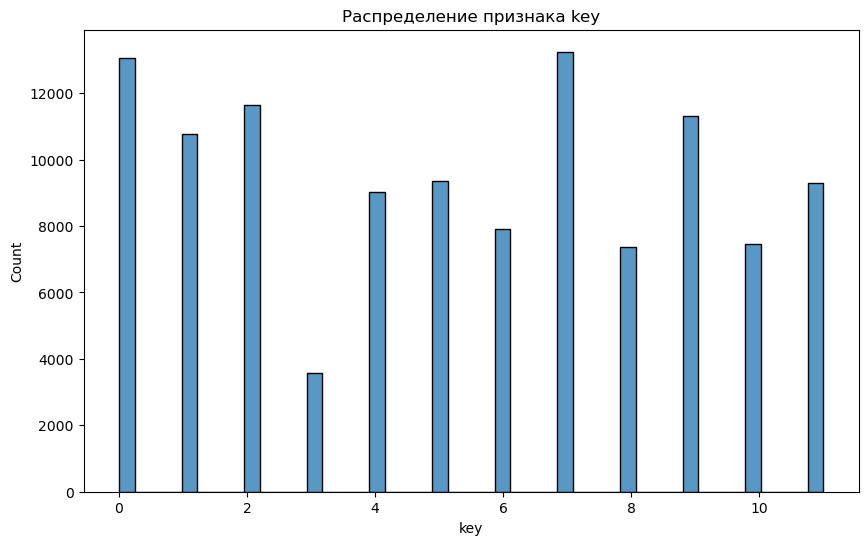

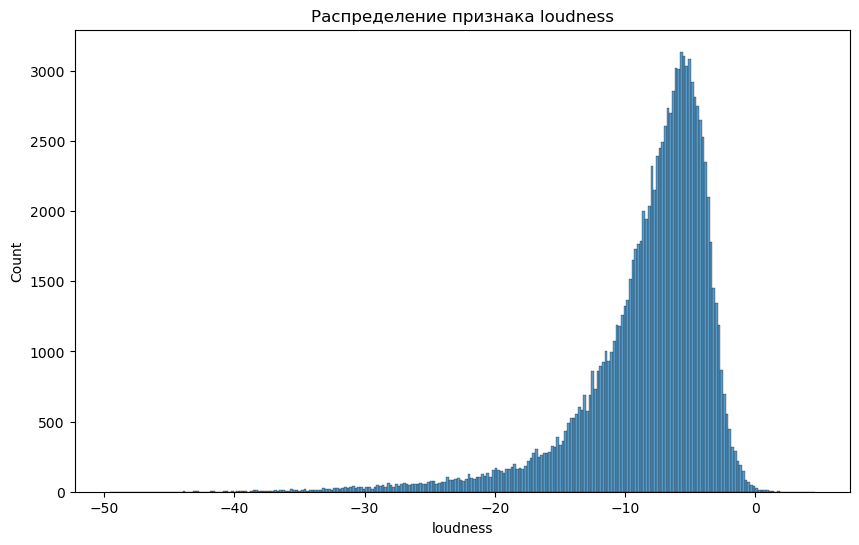

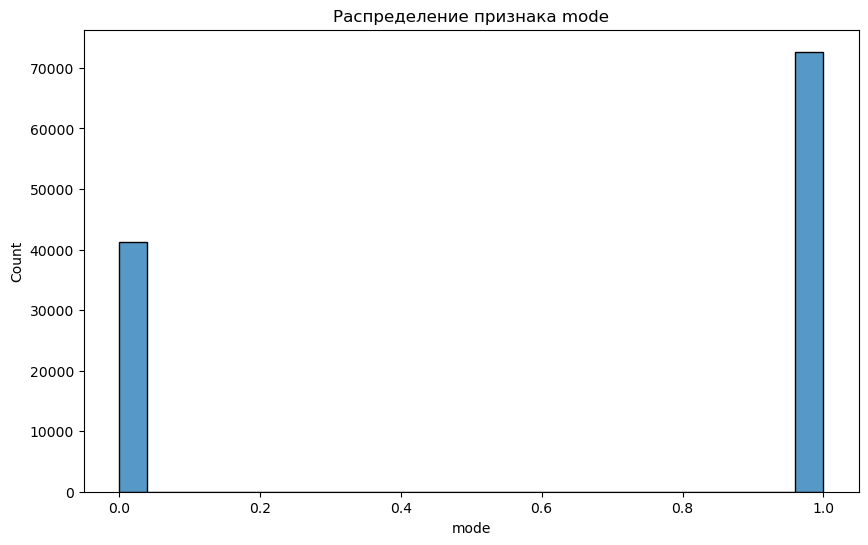

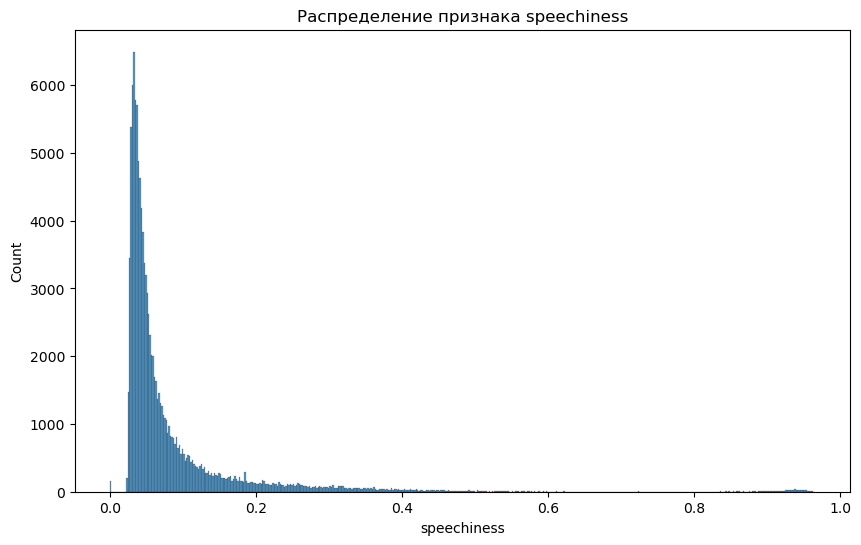

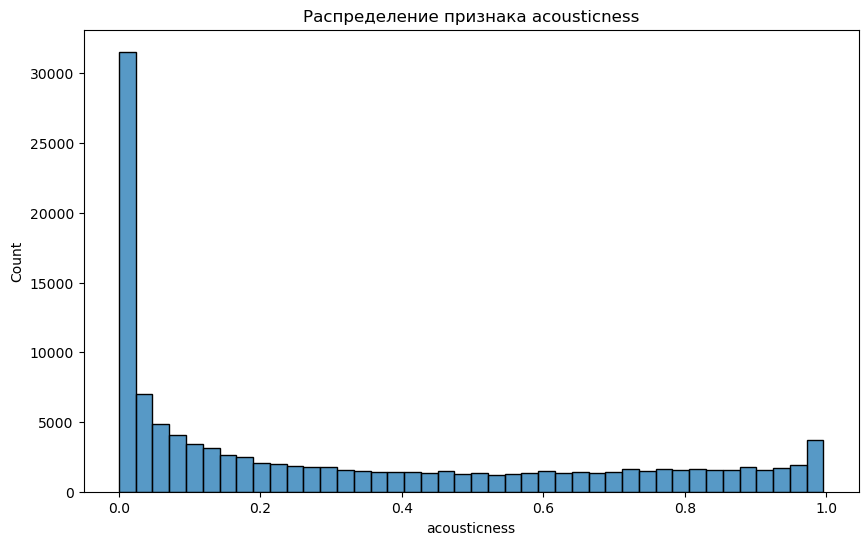

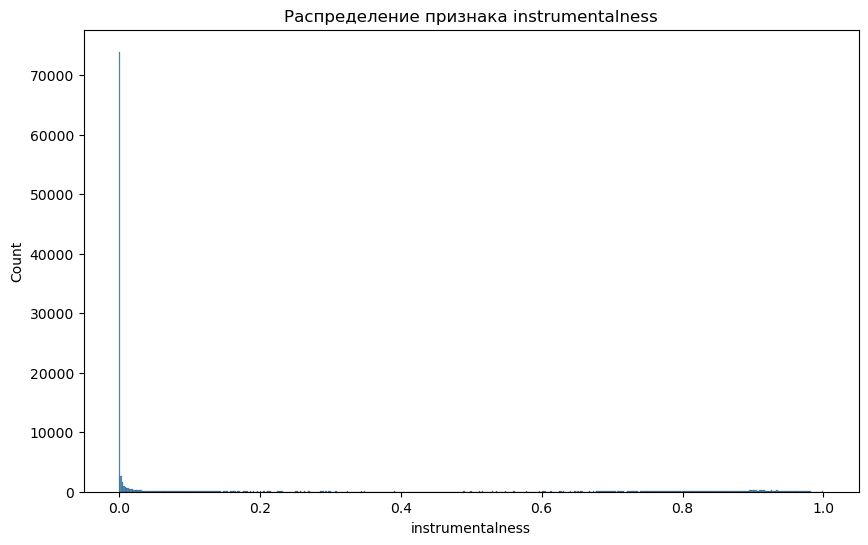

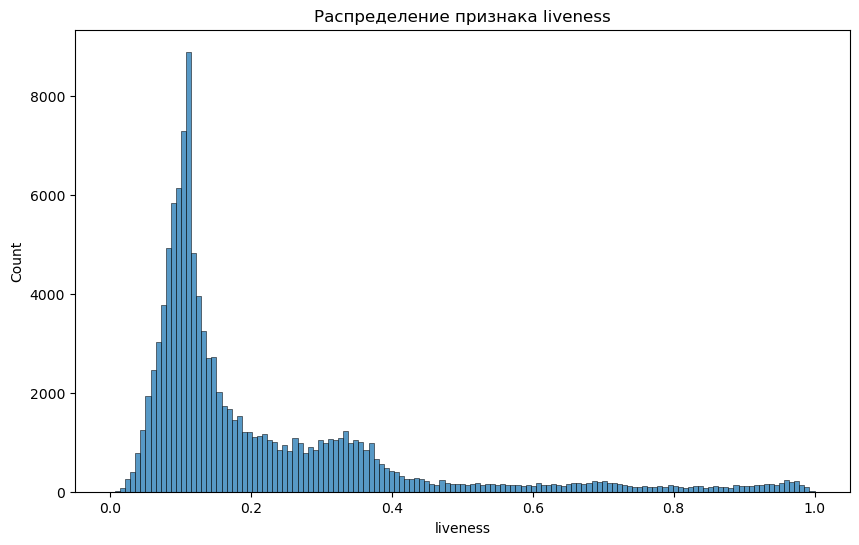

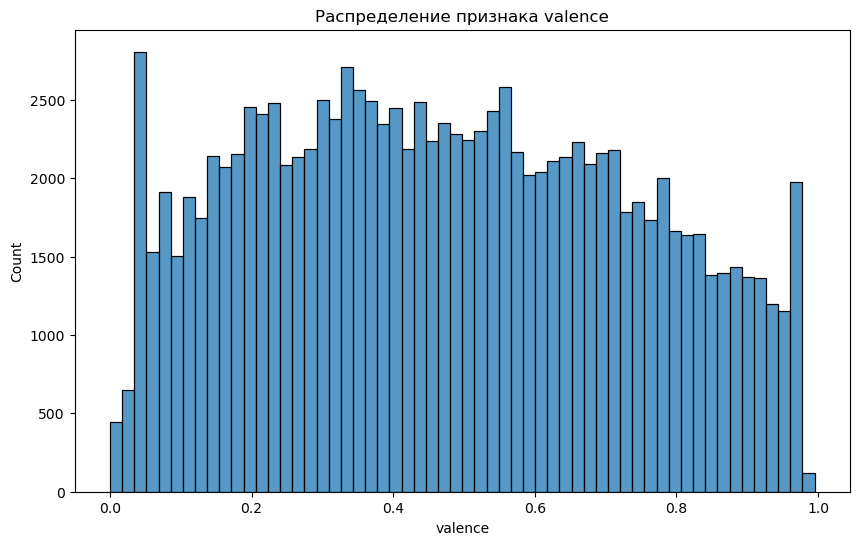

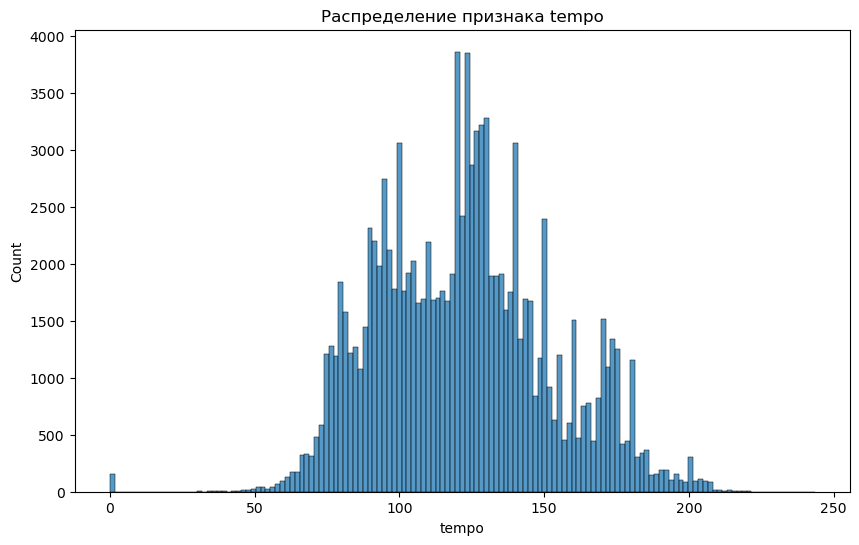

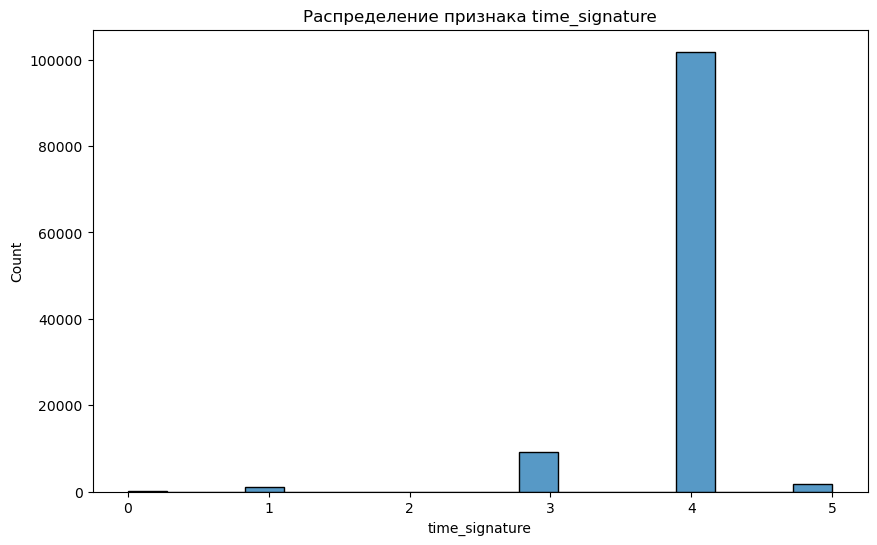

In [1066]:
for col in df.select_dtypes(include=np.number).columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(data=df, x=col)
    plt.title(f'Распределение признака {col}')
    plt.show()

Используем LabelEncoder, чтобы закодировать object и bool значения в категориальные, для возможности их интерпретирования моделями.

In [1069]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
label_encoders = {}
for col in categorical_columns:
    enc = LabelEncoder();
    df[col] = enc.fit_transform(df[col]);
    label_encoders[col] = enc;

df.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,10358,8101,11742,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0
1,3288,14797,22529,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0
2,12398,39163,60775,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0
3,14840,8581,9581,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0
4,5256,16900,25690,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0


Построим тепловую карту корреляционной матрицы

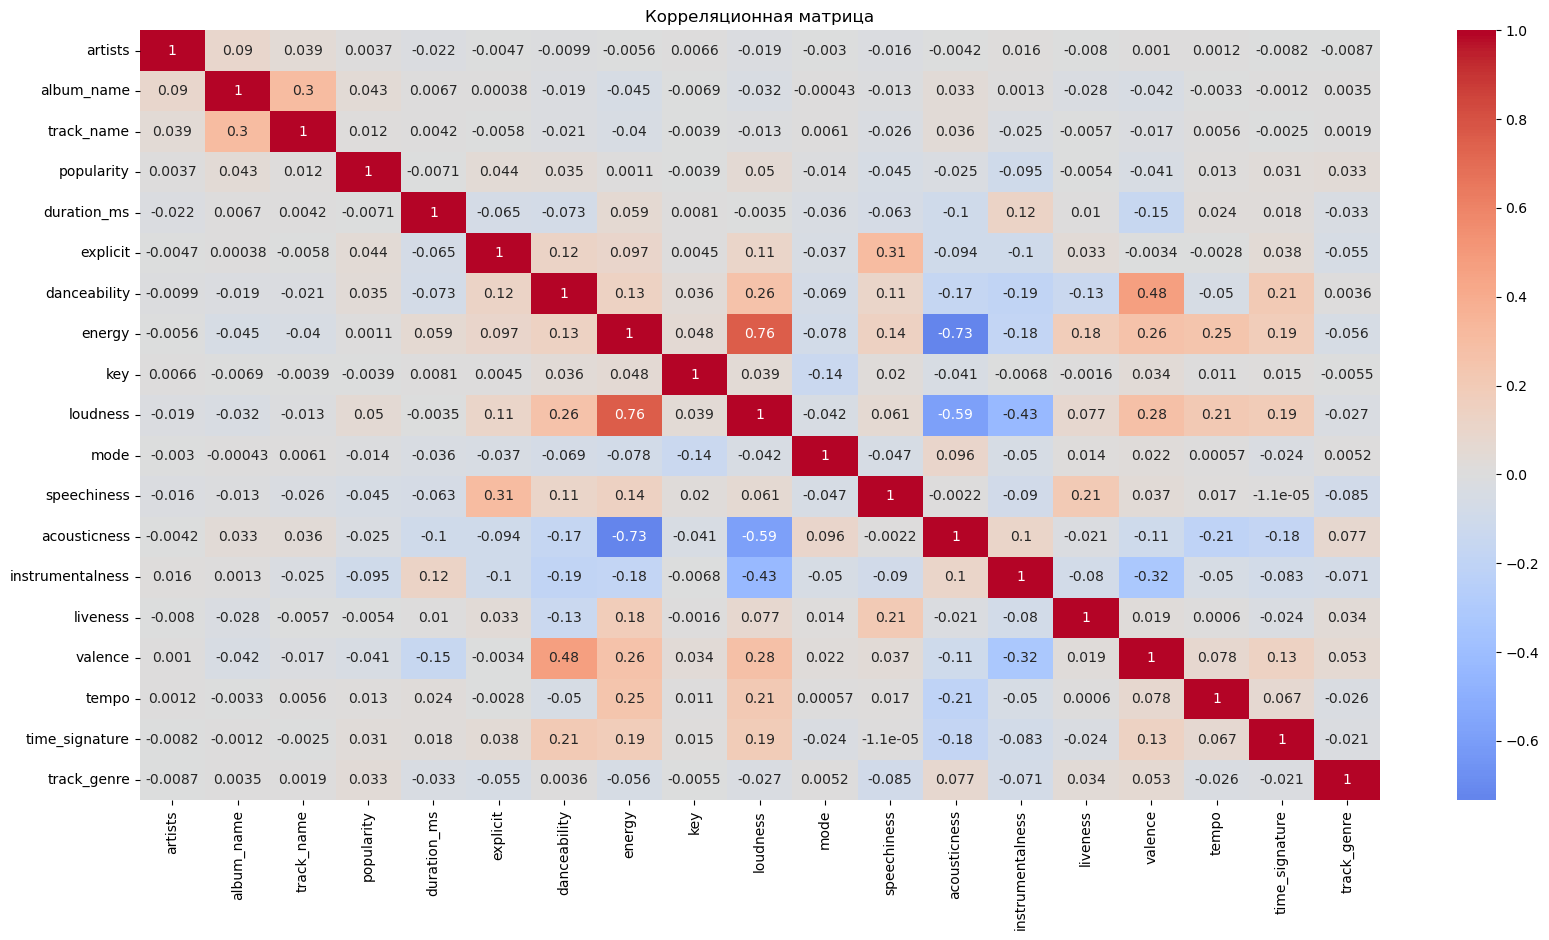

In [1072]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица')
plt.show()

**Корреляция**<br>
Наблюдаем наибольшую корреляцию для колонки popularity:
<ul>
    <li>album_name: 0.043</li>
    <li>explicit: 0.044</li>
    <li>danceability: 0.035</li>
    <li>loudness: 0.05</li>
    <li>speechliness: -0.045</li>
    <li>instrumentalness: -0.095</li>
    <li>time_signature: 0.031</li>
    <li>track_genre: 0.033</li>
</ul>

### Feature Engineering

Разделим музыку по ее громкости и построим графики

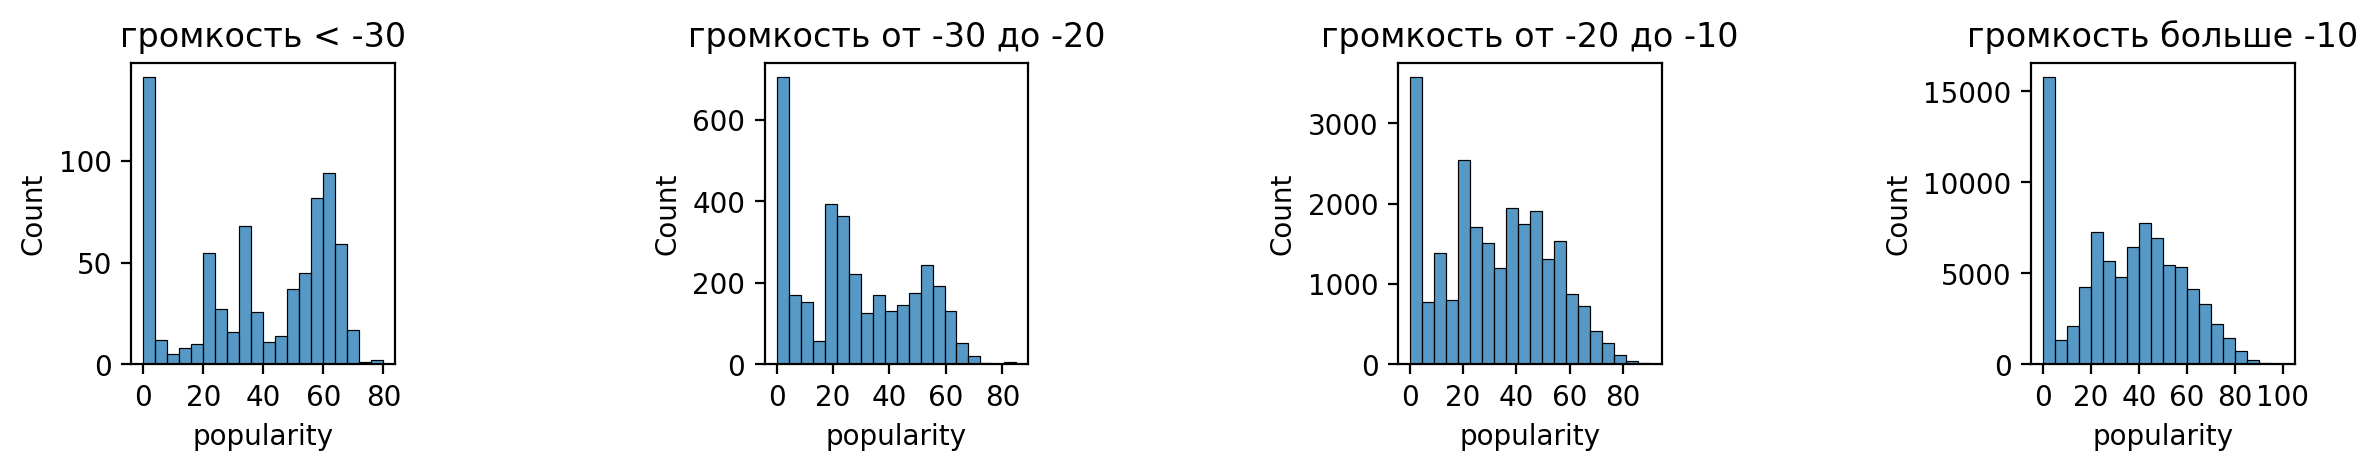

In [686]:
plt.figure(figsize=(16,9),dpi=200)

plt.subplot(4, 8, 1)
plt.xticks([0,20,40,60,80,100])
sns.histplot(data[(data['loudness'] <= -30)]['popularity'], bins=20)
plt.title('громкость < -30')

plt.subplot(4, 8, 3)
plt.xticks([0,20,40,60,80,100])
sns.histplot(data[(data['loudness'] > -30) & (data['loudness'] <= -20)]['popularity'], bins=20)
plt.title('громкость от -30 до -20')

plt.subplot(4, 8, 5)
plt.xticks([0,20,40,60,80,100])
sns.histplot(data[(data['loudness'] > -20) & (data['loudness'] <= -10)]['popularity'], bins=20)
plt.title('громкость от -20 до -10')

plt.subplot(4, 8, 7)
plt.xticks([0,20,40,60,80,100])
sns.histplot(data[(data['loudness'] > -10)]['popularity'], bins=20)
plt.title('громкость больше -10')
plt.show()

Среднее значение громкости для всей музыки

In [939]:
df.loudness.mean()

-8.258960368421052

Разделим музыку на три категории: Громкая (>-5), Тихая (<-10) и Средняя от -10 до -5

In [945]:
df['loudness_cat'] = 0
df.loc[(df['loudness'] > -5), 'loudness_cat'] = 1
df.loc[(df['loudness'] <= -10), 'loudness_cat'] = 2

In [947]:
df[['loudness', 'loudness_cat']]

,loudness,loudness_cat
0,-6.746,0
1,-17.235,2
2,-9.734,0
3,-18.515,2
4,-9.681,0
...,...,...
113995,-16.393,2
113996,-18.318,2
113997,-10.895,2
113998,-10.889,2


Разделим датасет по длине трека

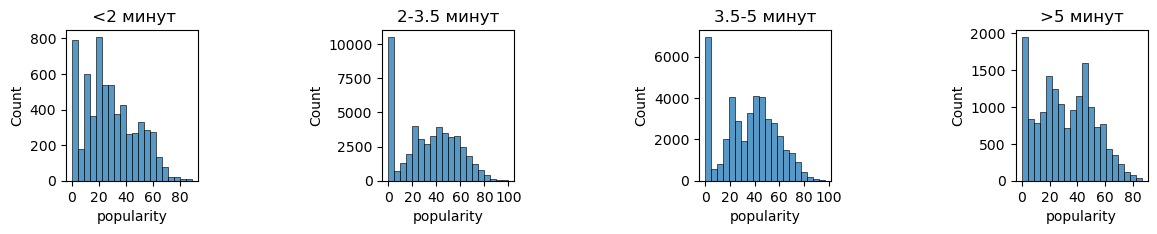

In [689]:
plt.figure(figsize=(16,9))

plt.subplot(4, 8, 1)
plt.xticks([0,20,40,60,80,100])
sns.histplot(data[data['duration_ms'] <= 120000]['popularity'],bins=20)
plt.title(' <2 минут')

plt.subplot(4, 8, 3)
plt.xticks([0,20,40,60,80,100])
sns.histplot(data[(data['duration_ms'] > 120000) & (data['duration_ms'] < 210000)]['popularity'],bins=20)
plt.title('2-3.5 минут')

plt.subplot(4, 8, 5)
plt.xticks([0,20,40,60,80,100])
sns.histplot(data[(data['duration_ms'] > 210000) & (data['duration_ms'] < 300000)]['popularity'],bins=20)
plt.title('3.5-5 минут')

plt.subplot(4, 8, 7)
plt.xticks([0,20,40,60,80,100])
sns.histplot(data[data['duration_ms'] > 300000]['popularity'],bins=20)
plt.title('>5 минут')
plt.show()

На данных графиках видно, что для разной длинны трека средняя популярность так же меняется

Добавим категории для длины трека: Короткий <120000ms, Средний короткий 2-3.5 минут, Средний длинный 3.5-5 минут, Длинный >5 минут

In [957]:
df['duration_cat'] = 0
df.loc[(df['duration_ms'] >= 120000) & (df['duration_ms'] <= 210000), 'duration_cat'] = 1
df.loc[(df['duration_ms'] > 210000) & (df['duration_ms'] <= 300000), 'duration_cat'] = 2
df.loc[(df['duration_ms'] > 300000), 'duration_cat'] = 3

In [959]:
df[['duration_ms', 'duration_cat']]

,duration_ms,duration_cat
0,230666,2
1,149610,1
2,210826,2
3,201933,1
4,198853,1
...,...,...
113995,384999,3
113996,385000,3
113997,271466,2
113998,283893,2


Разделим датасет по BPM, рассмотрим его влияние на популярность

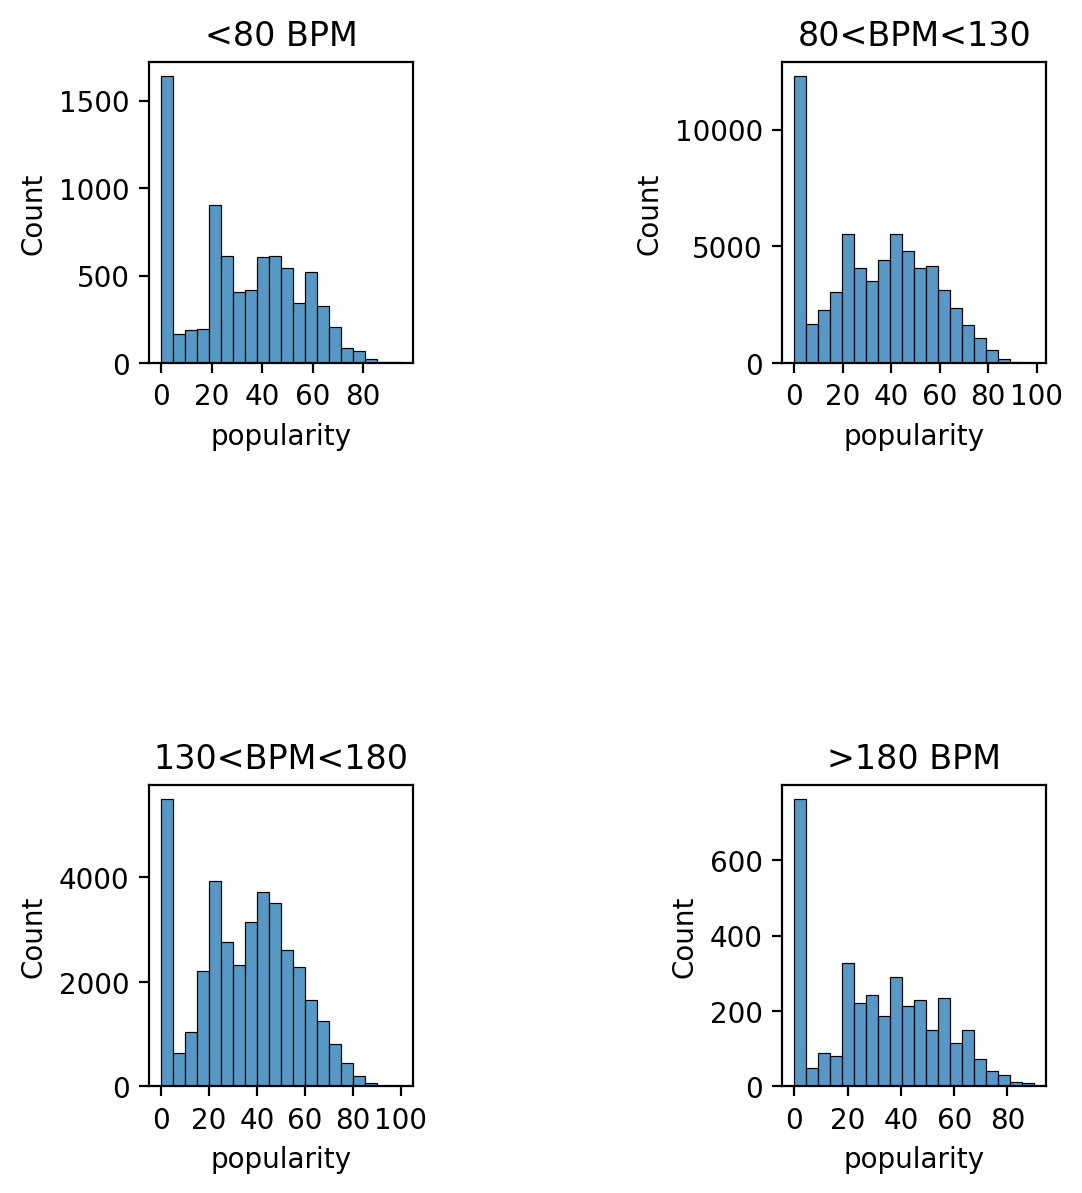

In [961]:
plt.figure(figsize=(16,9),dpi=200)

plt.subplot(4, 8, 1)
plt.xticks([0,20,40,60,80,100])
sns.histplot(data[(data['tempo'] < 80)]['popularity'], bins=20)
plt.title('<80 BPM')

plt.subplot(4, 8, 3)
plt.xticks([0,20,40,60,80,100])
sns.histplot(data[(data['tempo'] >= 80) & (data['tempo'] <= 130)]['popularity'], bins=20)
plt.title('80<BPM<130')

plt.subplot(4, 8, 17)
plt.xticks([0,20,40,60,80,100])
sns.histplot(data[(data['tempo'] > 130) & (data['tempo'] <= 180)]['popularity'], bins=20)
plt.title('130<BPM<180')

plt.subplot(4, 8, 19)
plt.xticks([0,20,40,60,80,100])
sns.histplot(data[(data['tempo'] > 180)]['popularity'], bins=20)
plt.title('>180 BPM')
plt.show()

Видим увеличение популярности для трекой с средним BPM больше. Поэтому добавим категории для BPM

Низкий BPM 80-130, Высокий 130-180, и остальной, т.к. их графики особо не отличаются

In [693]:
df['tempo_cat'] = 0
df.loc[(df['tempo'] >= 80) & (df['tempo'] <= 130), 'tempo_cat'] = 1
df.loc[(df['tempo'] > 130) & (df['tempo'] <= 180), 'tempo_cat'] = 2

In [694]:
df[['tempo', 'tempo_cat']]

,tempo,tempo_cat
0,87.917,1
1,77.489,0
2,76.332,0
3,181.740,0
4,119.949,1
...,...,...
113995,125.995,1
113996,85.239,1
113997,132.378,2
113998,135.960,2


Сгруппируем треки по их жанру и выведем среднюю популярность жанров

In [696]:
data.groupby('track_genre')['popularity'].mean().sort_values()

track_genre
iranian            2.210
romance            3.245
latin              8.297
detroit-techno    11.174
chicago-house     12.339
                   ...  
grunge            49.594
sad               52.379
chill             53.651
k-pop             56.896
pop-film          59.283
Name: popularity, Length: 114, dtype: float64

Сделаем промежуточный датасет в котором будет популярность жанра для каждого трека

In [697]:
pop = pd.merge(data, genre_pop, on='track_genre', how='left')
pop

,Unnamed: 0,track_id,artists,album_name,track_name,popularity_x,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_y
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,42.483
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,42.483
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,42.483
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,42.483
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,42.483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,41.873
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,41.873
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,41.873
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,41.873


Сделаем несколько категорий, разделяющих по популярности жанра

In [698]:
genre_pop = data.groupby('track_genre')['popularity'].mean().sort_values()
pop = pd.merge(data, genre_pop, on='track_genre', how='left')
df['genre_cat'] = 0
df.loc[pop['popularity_y'] < 15, 'genre_cat'] = 1
df.loc[(pop['popularity_y'] >= 15) & (pop['popularity_y'] < 25), 'genre_cat'] = 2
df.loc[(pop['popularity_y'] >= 25) & (pop['popularity_y'] < 30), 'genre_cat'] = 3
df.loc[(pop['popularity_y'] >= 30) & (pop['popularity_y'] < 35), 'genre_cat'] = 4
df.loc[(pop['popularity_y'] >= 35) & (pop['popularity_y'] < 40), 'genre_cat'] = 5
df.loc[(pop['popularity_y'] >= 40) & (pop['popularity_y'] < 45), 'genre_cat'] = 6
df.loc[(pop['popularity_y'] >= 45) & (pop['popularity_y'] < 50), 'genre_cat'] = 7
df.loc[(pop['popularity_y'] >= 50) & (pop['popularity_y'] < 60), 'genre_cat'] = 8

In [699]:
df[['track_genre', 'genre_cat']]

,track_genre,genre_cat
0,0,6
1,0,6
2,0,6
3,0,6
4,0,6
...,...,...
113995,113,6
113996,113,6
113997,113,6
113998,113,6


Получившийся датасет

In [700]:
df

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre,loudness_cat,duration_cat,tempo_cat,genre_cat
0,10358,8101,11742,73,230666,0,0.676,0.4610,1,-6.746,...,0.000001,0.3580,0.7150,87.917,4,0,1,2,1,6
1,3288,14797,22529,55,149610,0,0.420,0.1660,1,-17.235,...,0.000006,0.1010,0.2670,77.489,4,0,0,1,0,6
2,12398,39163,60775,57,210826,0,0.438,0.3590,0,-9.734,...,0.000000,0.1170,0.1200,76.332,4,0,1,2,0,6
3,14840,8581,9581,71,201933,0,0.266,0.0596,0,-18.515,...,0.000071,0.1320,0.1430,181.740,3,0,0,1,0,6
4,5256,16900,25690,82,198853,0,0.618,0.4430,2,-9.681,...,0.000000,0.0829,0.1670,119.949,4,0,1,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,22487,67,53330,21,384999,0,0.172,0.2350,5,-16.393,...,0.928000,0.0863,0.0339,125.995,5,113,0,0,1,6
113996,22487,67,65091,22,385000,0,0.174,0.1170,0,-18.318,...,0.976000,0.1050,0.0350,85.239,4,113,0,0,1,6
113997,4953,5029,38208,22,271466,0,0.629,0.3290,0,-10.895,...,0.000000,0.0839,0.7430,132.378,4,113,0,2,2,6
113998,18535,7239,21508,41,283893,0,0.587,0.5060,7,-10.889,...,0.000000,0.2700,0.4130,135.960,4,113,0,2,2,6


## Обучение моделей

#### Подготовка датасетов

Удалим колонки, которые я считаю нерелятивными для обучения моделей

In [701]:
df = df.drop(['artists','album_name','track_name'], axis=1)

Разделим датасет на две части, обучающую(80%) и тестовую(20%)

In [702]:
from sklearn.model_selection import train_test_split

x = df.drop('popularity', axis=1)
y = df['popularity']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle=True, random_state=52)

In [704]:
x_train.head()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,loudness_cat,duration_cat,tempo_cat,genre_cat
48662,207586,0,0.412,0.823,4,-2.572,0,0.0323,0.000096,0.000082,0.1530,0.162,154.115,4,48,1,1,2,5
96276,150226,0,0.433,0.748,7,-7.136,0,0.0520,0.756000,0.000000,0.7340,0.501,92.899,4,96,1,1,1,5
44720,282093,1,0.328,0.826,6,-5.085,1,0.0362,0.000224,0.000944,0.0818,0.341,106.606,4,44,1,2,1,7
44560,299733,0,0.552,0.645,7,-6.595,1,0.0268,0.001870,0.000001,0.0424,0.588,89.518,4,44,1,2,1,7
52947,138493,0,0.506,0.350,5,-9.810,1,0.0288,0.744000,0.000000,0.1130,0.682,108.653,4,52,1,1,1,2


Используем StandardScaler для стандартизации значений

In [707]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

#### Эксперементы с моделями

##### Линейная регрессия

In [737]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_pred, y_test)

print(f'MSE: {mse:.4f}\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}\nMAPE: {mape:.4f}')

MSE: 373.5092
RMSE: 19.3264
MAE: 14.3512
MAPE: 0.4859


##### Ridge

In [739]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_pred, y_test)

print(f'MSE: {mse:.4f}\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}\nMAPE: {mape:.4f}')

MSE: 373.5093
RMSE: 19.3264
MAE: 14.3512
MAPE: 0.4859


🤏 чут-чут хуже  чем обычная линейная регрессия

#### DecisionTreeRegressor

In [779]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(max_depth=8)
tree_model.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse:.4f}\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}\nMAPE: {mape}')

MSE: 362.6036
RMSE: 19.0422
MAE: 13.8361
MAPE: 1.6223692779196598e+16


Значения уже лучше, чем у линейных моделей

In [1008]:
##### RandomForest

In [838]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse:.4f}\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}\nMAPE: {mape}')

MSE: 271.8465
RMSE: 16.4878
MAE: 11.5149
MAPE: 1.1461381737177698e+16


Значения уже намного лучше

##### GradientBoosting

In [751]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_pred, y_test)

print(f'MSE: {mse:.4f}\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}\nMAPE: {mape:.4f}')

MSE: 362.1475
RMSE: 19.0302
MAE: 14.0807
MAPE: 0.4838


Значения как у обычных линейных моделей

##### Нейронная сеть

In [824]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
model = Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
loss = model.evaluate(x_test, y_test)
y_pred = model.predict(x_test)

Epoch 1/10


D:\conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2850/2850 ━━━━━━━━━━━━━━━━━━━━ 2s 631us/step - loss: 520.7993 - val_loss: 373.5814
Epoch 2/10
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 2s 608us/step - loss: 377.4641 - val_loss: 371.7251
Epoch 3/10
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 2s 626us/step - loss: 369.2508 - val_loss: 366.6451
Epoch 4/10
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 2s 623us/step - loss: 366.6427 - val_loss: 367.1355
Epoch 5/10
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 2s 642us/step - loss: 364.2785 - val_loss: 367.7930
Epoch 6/10
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 2s 615us/step - loss: 368.4334 - val_loss: 362.7803
Epoch 7/10
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 2s 610us/step - loss: 361.5063 - val_loss: 361.9348
Epoch 8/10
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 2s 610us/step - loss: 359.5028 - val_loss: 363.9259
Epoch 9/10
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 2s 564us/step - loss: 358.6989 - val_loss: 361.4660
Epoch 10/10
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 2s 590us/step - loss: 354.7892 - val_loss: 360.9519
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 360.3932
713/713 ━━

оценка модели

In [825]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mape = mean_absolute_percentage_error(y_pred, y_test)

print(f'Loss: {loss:.4f}\nMSE: {mse:.4f}\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}\nMAPE: {mape}')

Loss: 360.9519
MSE: 360.9516
RMSE: 18.9987
MAE: 14.2189
MAPE: 0.5069667722428746


Значения опять же почти не отличаются от линейной регрессиии

##### Модель с dropout

In [832]:
model = Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
loss = model.evaluate(x_test, y_test)
y_pred = model.predict(x_test)

Epoch 1/10


D:\conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2850/2850 ━━━━━━━━━━━━━━━━━━━━ 3s 692us/step - loss: 530.8780 - val_loss: 381.7890
Epoch 2/10
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 2s 637us/step - loss: 392.3196 - val_loss: 379.4623
Epoch 3/10
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 2s 665us/step - loss: 389.9942 - val_loss: 371.5424
Epoch 4/10
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 2s 635us/step - loss: 385.6598 - val_loss: 372.7336
Epoch 5/10
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 3s 647us/step - loss: 381.7527 - val_loss: 374.3479
Epoch 6/10
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 2s 657us/step - loss: 384.4578 - val_loss: 370.1468
Epoch 7/10
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 2s 642us/step - loss: 379.0532 - val_loss: 385.3733
Epoch 8/10
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 2s 627us/step - loss: 377.3163 - val_loss: 379.3757
Epoch 9/10
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 2s 628us/step - loss: 379.8614 - val_loss: 392.0347
Epoch 10/10
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 2s 659us/step - loss: 374.8504 - val_loss: 374.6331
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 374.1389
713/713 ━━

In [833]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mape = mean_absolute_percentage_error(y_pred, y_test)

print(f'Loss: {loss:.4f}\nMSE: {mse:.4f}\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}\nMAPE: {mape}')

Loss: 374.6331
MSE: 374.6329
RMSE: 19.3554
MAE: 14.5703
MAPE: 0.5230095935293707


### Кросс валидация

#### Важность признаков

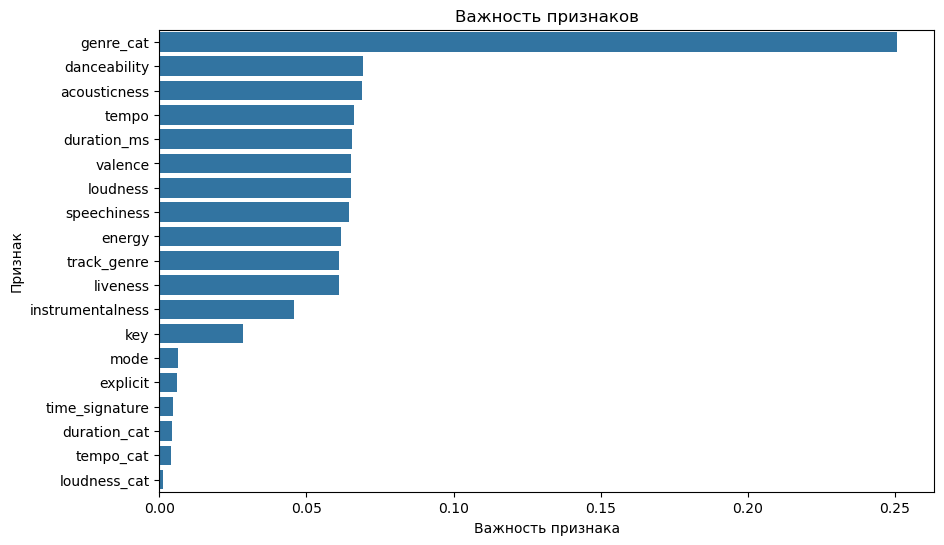

In [1030]:
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

feature_importance = pd.DataFrame({'feature': x.columns, 'importance': model.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков')
plt.show()

Используем кросс валидацию на моей лучшей моделе - RandomForestRegressor

In [852]:
from sklearn.model_selection import KFold, cross_validate

model = RandomForestRegressor(n_jobs=-1)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'neg_median_absolute_error': 'neg_median_absolute_error'
}

scores = cross_validate(model, x, y, cv=kf, scoring=scoring, n_jobs=-1)

In [861]:
mse = -scores['test_neg_mean_squared_error'].mean()
mae = -scores['test_neg_median_absolute_error'].mean()
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 6.782887878787878
MSE: 258.1868242153089
RMSE: 16.068192935588897


Значительное улучшение относительно обычной модели

<h3>Вывод</h3>
Обучение различных моделей показывает среднюю точность MAE и RMSE, MAPE больше 50% значит, что модель имеет значительные отклонения предсказаний от истинных значений. Это связано с тем что модель хорошо справляется с большинством предсказаний, но некоторые предсказания имеют очень большое отклонение. По-моему это из-за аномальной популярности некоторых треков, допустим какой-нибудь заурядный трек популязируется благодаря его продвижению в медиа, или какой-нибудь случайный человек выпускает трек в жанре k-pop и получает значение популярности 0.

In [ ]:
RandomForestRegressor показал наилучшие результаты среди всех обученных моделей, следовательно его и стоит использовать на этих данных.